* Booking patterns (e.g., which days of the week are most popular for bookings)
* Occupancy rates (e.g., how many rooms are typically booked at any given time)
* Booking lead time (e.g., how far in advance do customers typically book their rooms)
* Customer demographics (e.g., age, gender, country of origin)
* Channel and source effectiveness (e.g., which channels and sources are most effective in generating bookings)
* Payment methods (e.g., which payment methods are most popular)
* Cancellation rates (e.g., what factors contribute to cancellations)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the hotel booking dataset into a pandas DataFrame
hotel_df = pd.read_csv('../data/hotel_bookings.csv')
hotel_df.head()

,Unnamed: 0,Hotel,Is repeated guest,Arrival date,Departure date,Lead time,Adults,Children,Babies,Meal,...,Days in waiting list,Customer City,Customer State,ADR,Required car parking spaces,Total of special requests,Reservation status,Reservation status date,Booking Date,Canceled
0,0,City Hotel,0,2021-10-12,2020-04-13,79,1,1,0,FB,...,17,Madrid,Paris,168.36,0,3,Canceled,2021-04-30,2021-07-25,1
1,1,Resort Hotel,0,2022-08-30,2020-08-20,278,3,0,1,FB,...,34,London,Lisbon,149.85,1,3,Check-Out,2022-12-01,2021-11-25,0
2,2,Resort Hotel,0,2022-09-10,2022-02-27,180,3,2,1,FB,...,36,Berlin,Paris,104.59,2,4,Check-Out,2022-07-27,2022-03-14,0
3,3,City Hotel,1,2020-03-30,2020-04-27,101,2,0,1,HB,...,28,Madrid,Madrid,99.90,0,3,Check-Out,2021-11-30,2019-12-20,0
4,4,Resort Hotel,0,2021-08-15,2022-02-15,205,3,2,0,BB,...,31,Lisbon,Madrid,52.37,1,0,Check-Out,2021-02-10,2021-01-22,0


In [10]:
hotel_df.columns

Index(['Unnamed: 0', 'Hotel', 'Is repeated guest', 'Arrival date',
       'Departure date', 'Lead time', 'Adults', 'Children', 'Babies', 'Meal',
       'Country', 'Market segment', 'Distribution channel', 'Customer type',
       'Room type', 'Booking changes', 'Deposit type', 'Agent', 'Company',
       'Days in waiting list', 'Customer City', 'Customer State', 'ADR',
       'Required car parking spaces', 'Total of special requests',
       'Reservation status', 'Reservation status date', 'Booking Date',
       'Canceled'],
      dtype='object')

# Booking patterns (e.g., which days of the week are most popular for bookings)

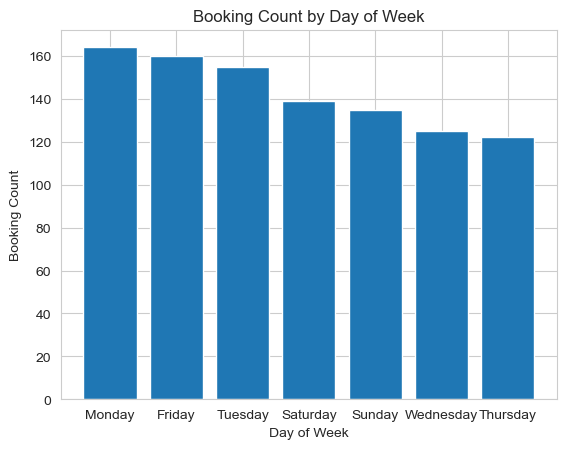

In [11]:
# Convert Arrival date to datetime format
hotel_df['Arrival date'] = pd.to_datetime(hotel_df['Arrival date'])

# Add a new column for day of the week
hotel_df['Day of week'] = hotel_df['Arrival date'].dt.day_name()

# Group the data by day of the week and count the number of bookings
booking_count = hotel_df.groupby(['Day of week'])['Hotel'].count().reset_index()

# Sort the data by booking count in descending order
booking_count = booking_count.sort_values(by=['Hotel'], ascending=False)

# Create a bar plot of the booking count by day of the week
plt.bar(booking_count['Day of week'], booking_count['Hotel'])
plt.title('Booking Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Booking Count')
plt.show()


# Occupancy rates (e.g., how many rooms are typically booked at any given time)

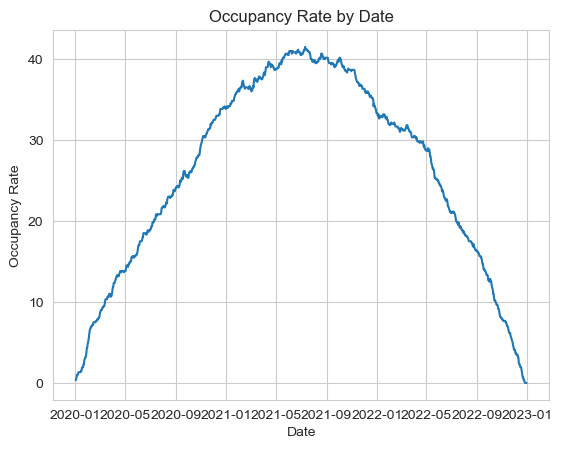

In [12]:

# Convert Arrival date and Departure date to datetime format
hotel_df['Arrival date'] = pd.to_datetime(hotel_df['Arrival date'])
hotel_df['Departure date'] = pd.to_datetime(hotel_df['Departure date'])

# Create a new dataframe with each day between the earliest and latest arrival date
date_range = pd.date_range(start=hotel_df['Arrival date'].min(), end=hotel_df['Arrival date'].max(), freq='D')
occupancy_data = pd.DataFrame({'Date': date_range})

# Calculate the number of occupied rooms for each day in the date range
occupied_rooms = []
for date in date_range:
    num_occupied = len(hotel_df[(date >= hotel_df['Arrival date']) & (date < hotel_df['Departure date'])])
    occupied_rooms.append(num_occupied)
occupancy_data['Occupied Rooms'] = occupied_rooms

# Calculate the total number of rooms
total_rooms = len(hotel_df['Hotel'].unique()) * len(hotel_df['Room type'].unique())

# Calculate the occupancy rate for each day
occupancy_data['Occupancy Rate'] = occupancy_data['Occupied Rooms'] / total_rooms

# Create a line plot of the occupancy rate by date
plt.plot(occupancy_data['Date'], occupancy_data['Occupancy Rate'])
plt.title('Occupancy Rate by Date')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.show()


# Booking lead time (e.g., how far in advance do customers typically book their rooms)

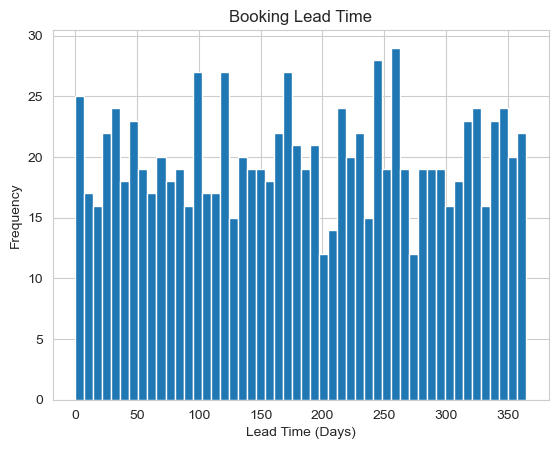

In [14]:
# Convert Arrival date to datetime format
hotel_df['Arrival date'] = pd.to_datetime(hotel_df['Arrival date'])

# Calculate the booking lead time in days
#hotel_df['Lead time'] = (hotel_df['Arrival date'] - pd.to_datetime(hotel_df['Booking date'])).dt.days

# Create a histogram of the booking lead time
plt.hist(hotel_df['Lead time'], bins=50)
plt.title('Booking Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()


# Cancellation patterns

In [ ]:
# Drop rows with missing data
hotel_df.dropna(inplace=True)

# Calculate cancellation rates by hotel and room type
cancellation_rates = hotel_df.groupby(['Hotel', 'Room type'])['Canceled'].mean()

# Sort cancellation rates in descending order
cancellation_rates = cancellation_rates.sort_values(ascending=False)

# Plot cancellation rates by hotel and room type
cancellation_rates.plot(kind='bar')
plt.title('Cancellation Rates by Hotel and Room Type')
plt.xlabel('Hotel, Room Type')
plt.ylabel('Cancellation Rate')
plt.show()

# Calculate cancellation rates by booking channel and source
cancellation_rates = hotel_df.groupby(['Distribution channel', 'Market segment'])['Canceled'].mean()

# Sort cancellation rates in descending order
cancellation_rates = cancellation_rates.sort_values(ascending=False)

# Plot cancellation rates by booking channel and source
cancellation_rates.plot(kind='bar')
plt.title('Cancellation Rates by Booking Channel and Source')
plt.xlabel('Distribution Channel, Booking Channel')
plt.ylabel('Cancellation Rate')
plt.show()


Channel effectiveness

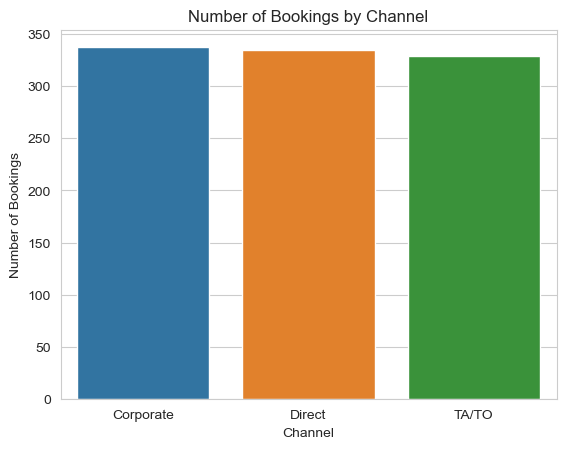

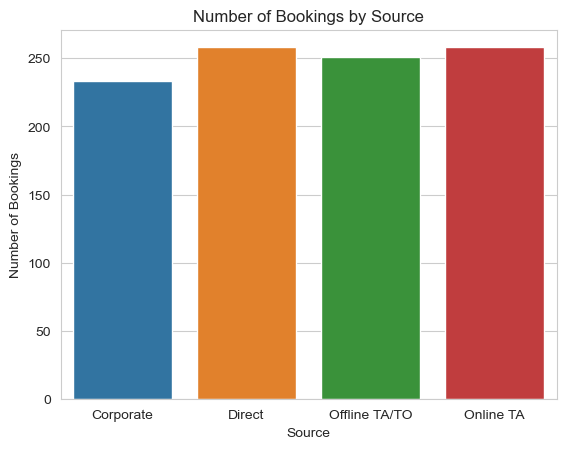

KeyError: 'Column not found: Total Price'

In [23]:
# Group the data by channel and calculate the total number of bookings for each channel
bookings_by_channel = hotel_df.groupby('Distribution channel')['Unnamed: 0'].count().reset_index()

# Plot a bar chart of the number of bookings by channel
sns.barplot(x='Distribution channel', y='Unnamed: 0', data=bookings_by_channel)
plt.title('Number of Bookings by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Bookings')
plt.show()

# Group the data by source and calculate the total number of bookings for each source
bookings_by_source = hotel_df.groupby('Market segment')['Unnamed: 0'].count().reset_index()

# Plot a bar chart of the number of bookings by source
sns.barplot(x='Market segment', y='Unnamed: 0', data=bookings_by_source)
plt.title('Number of Bookings by Source')
plt.xlabel('Source')
plt.ylabel('Number of Bookings')
plt.show()

# Group the data by channel and source and calculate the total revenue for each combination
revenue_by_channel_source = hotel_df.groupby(['Distribution channel', 'Market segment'])['Total Price'].sum().reset_index()

# Plot a heatmap of the revenue by channel and source
pivot = revenue_by_channel_source.pivot('Distribution channel', 'Market segment', 'Total Price')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Revenue by Channel and Source')
plt.xlabel('Market segment')
plt.ylabel('Channel')
plt.show()


In [22]:
hotel_df.columns

Index(['Unnamed: 0', 'Hotel', 'Is repeated guest', 'Arrival date',
       'Departure date', 'Lead time', 'Adults', 'Children', 'Babies', 'Meal',
       'Country', 'Market segment', 'Distribution channel', 'Customer type',
       'Room type', 'Booking changes', 'Deposit type', 'Agent', 'Company',
       'Days in waiting list', 'Customer City', 'Customer State', 'ADR',
       'Required car parking spaces', 'Total of special requests',
       'Reservation status', 'Reservation status date', 'Booking Date',
       'Canceled', 'Day of week'],
      dtype='object')